In [270]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator
import numpy as np
from matplotlib.pyplot import imshow
from numpy import random
from datetime import datetime, date, time, timezone

# Using datetime.combine()
d = date(2005, 7, 14)
t = time(12, 30)
datetime.combine(d, t)

datetime.datetime(2005, 7, 14, 12, 30)

In [271]:
env_file = "/Users/MBall/PycharmProjects/BATMO/batmo/batdetect2-calls/cumulative_activity__Foliage_30T__formatted.csv"
foliage_df = pd.read_csv(env_file)

env_file0 = '/Users/MBall/PycharmProjects/BATMO/batmo/batdetect2-calls/cumulative_activity__Central_30T__formatted.csv'
centralpond_df = pd.read_csv(env_file0)

env_file4 = '/Users/MBall/PycharmProjects/BATMO/batmo/batdetect2-calls/cumulative_activity__Telephone_30T__formatted.csv'
telephonefield_df = pd.read_csv(env_file4)

env_file2 = "/Users/MBall/PycharmProjects/BATMO/batmo/2023-uwa.csv"
uwa23_df = pd.read_csv(env_file2)

In [272]:
# Assuming 'Date' and 'Time' are separate columns in the DataFrames *_df
foliage_df['Datetime'] = pd.to_datetime(foliage_df['Time'] + ' ' + foliage_df['Date'], format='%H:%M %m-%d-%y')
centralpond_df['Datetime'] = pd.to_datetime(centralpond_df['Time'] + ' ' + centralpond_df['Date'], format='%H:%M %m-%d-%y')
telephonefield_df['Datetime'] = pd.to_datetime(telephonefield_df['Time'] + ' ' + telephonefield_df['Date'], format='%H:%M %m-%d-%y')
uwa23_df['datetime'] = pd.to_datetime(uwa23_df['Date'] + ' ' + uwa23_df['Time'], format='%Y-%m-%d %H:%M:%S')

In [273]:
foliage_df


,Time,Date,Bat Calls,Datetime
0,03:00,05-31-23,1.0,2023-05-31 03:00:00
1,03:30,05-31-23,1.0,2023-05-31 03:30:00
2,04:00,05-31-23,7.0,2023-05-31 04:00:00
3,04:30,05-31-23,148.0,2023-05-31 04:30:00
4,05:00,05-31-23,252.0,2023-05-31 05:00:00
...,...,...,...,...
1171,11:00,07-25-23,0.0,2023-07-25 11:00:00
1172,11:30,07-25-23,0.0,2023-07-25 11:30:00
1173,12:00,07-25-23,0.0,2023-07-25 12:00:00
1174,12:30,07-25-23,0.0,2023-07-25 12:30:00


In [274]:
uwa23_df


,Pseudo-Julian-Date,Date,Time,Temperature,Dewpoint,Relhum,Speed,Gust,Direction,Pressure,Solar,SumRain,Rain,datetime
0,2.460097e+06,2023-06-01,00:00,61.0,42.7,50.8,5.8,6.3,292,1014.2,297.0,0.00,0.0,2023-06-01 00:00:00
1,2.460097e+06,2023-06-01,00:01,61.2,42.7,50.5,8.3,9.1,285,1014.2,305.0,0.00,0.0,2023-06-01 00:01:00
2,2.460097e+06,2023-06-01,00:02,61.3,42.9,50.7,6.0,8.9,326,1014.2,297.2,0.00,0.0,2023-06-01 00:02:00
3,2.460097e+06,2023-06-01,00:03,61.4,43.0,50.7,4.1,5.6,285,1014.1,297.2,0.00,0.0,2023-06-01 00:03:00
4,2.460097e+06,2023-06-01,00:04,61.6,42.9,50.2,8.1,9.4,275,1014.1,296.6,0.00,0.0,2023-06-01 00:04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90391,2.460160e+06,2023-08-02,18:33,72.7,50.8,46.0,6.9,9.2,181,1013.7,828.4,1.55,0.0,2023-08-02 18:33:00
90392,2.460160e+06,2023-08-02,18:34,72.7,50.8,46.0,8.2,10.3,190,1013.7,829.4,1.55,0.0,2023-08-02 18:34:00
90393,2.460160e+06,2023-08-02,18:35,72.7,50.7,45.9,9.7,12.6,213,1013.7,830.5,1.55,0.0,2023-08-02 18:35:00
90394,2.460160e+06,2023-08-02,18:36,72.7,50.8,46.0,8.8,10.8,207,1013.7,833.3,1.55,0.0,2023-08-02 18:36:00


In [275]:
# Convert Fahrenheit to Celsius
uwa23_df['Temperature'] = (uwa23_df['Temperature'] - 32) * 5/9

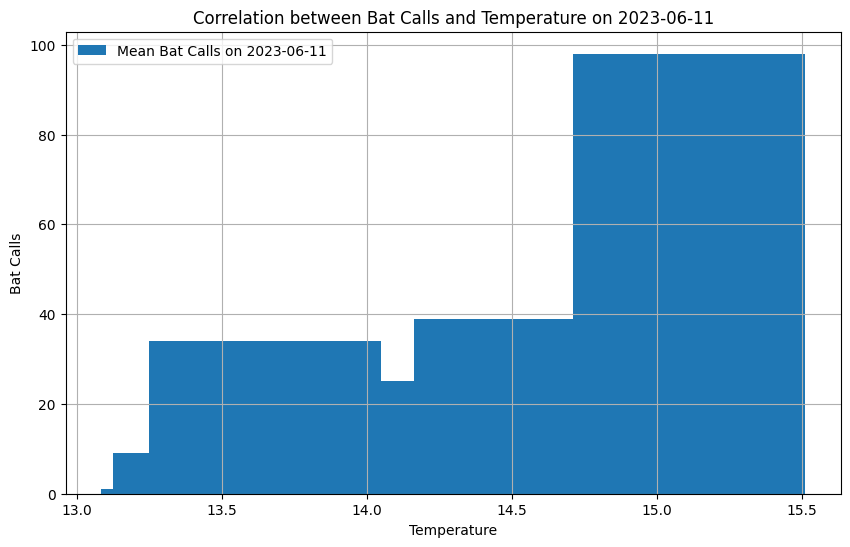

In [276]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data - replace with your actual data
# Assuming you have two dataframes: 'foliage_df' and 'uwa23_df'

# Convert 'Datetime' column to datetime type if it's not already
foliage_df['Datetime'] = pd.to_datetime(foliage_df['Datetime'])
uwa23_df['datetime'] = pd.to_datetime(uwa23_df['datetime'])

# Set 'Datetime' column as the index
foliage_df.set_index('Datetime', inplace=True)
uwa23_df.set_index('datetime', inplace=True)

# Filter data for June 8, 2023
specific_date = '2023-06-11'

foliage_data_on_date = foliage_df[foliage_df.index.date == pd.to_datetime(specific_date).date()]
uwa23_data_on_date = uwa23_df[uwa23_df.index.date == pd.to_datetime(specific_date).date()]

# Resample data for 30-minute intervals
resampled_foliage_data = foliage_data_on_date['Bat Calls'].resample('30T').mean()
resampled_uwa23_data = uwa23_data_on_date['Temperature'].resample('30T').mean()

# Create a new dataframe for plotting
plot_df = pd.DataFrame({'Temperature': resampled_uwa23_data, 'Bat Calls': resampled_foliage_data})

# Filter out rows where 'Bat Calls' is 0
plot_df = plot_df[plot_df['Bat Calls'] != 0]

# Create bar graph
plt.figure(figsize=(10, 6))
plt.bar(plot_df['Temperature'], plot_df['Bat Calls'], label=f'Mean Bat Calls on {specific_date}')

# Add labels and title
plt.xlabel('Temperature')
plt.ylabel('Bat Calls')
plt.title(f'Correlation between Bat Calls and Temperature on {specific_date}')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


In [277]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample data - replace with your actual data
# Assuming you have two dataframes: 'foliage_df' and 'uwa23_df'

# Convert 'Datetime' column to datetime type if it's not already
foliage_df['Datetime'] = pd.to_datetime(foliage_df['Datetime'])
uwa23_df['datetime'] = pd.to_datetime(uwa23_df['datetime'])

# Set 'Datetime' column as the index
foliage_df.set_index('Datetime', inplace=True)
uwa23_df.set_index('datetime', inplace=True)

# Resample to get mean values per night
mean_bat_calls = foliage_df['Bat Calls'].resample('D').mean()
mean_temperature = uwa23_df['Temperature'].resample('D').mean()

# Create a new dataframe for plotting
plot_df = pd.DataFrame({'Temperature': mean_temperature, 'Bat Calls': mean_bat_calls})

# Filter out rows where 'Bat Calls' is 0
plot_df = plot_df[plot_df['Bat Calls'] != 0]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(plot_df['Temperature'], plot_df['Bat Calls'], label='Mean Bat Calls')  # Updated label here

# Add labels and title
plt.xlabel('Temperature')
plt.ylabel('Bat Calls')
plt.title('Correlation between Bat Calls and Temperature')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()



KeyError: 'Datetime'

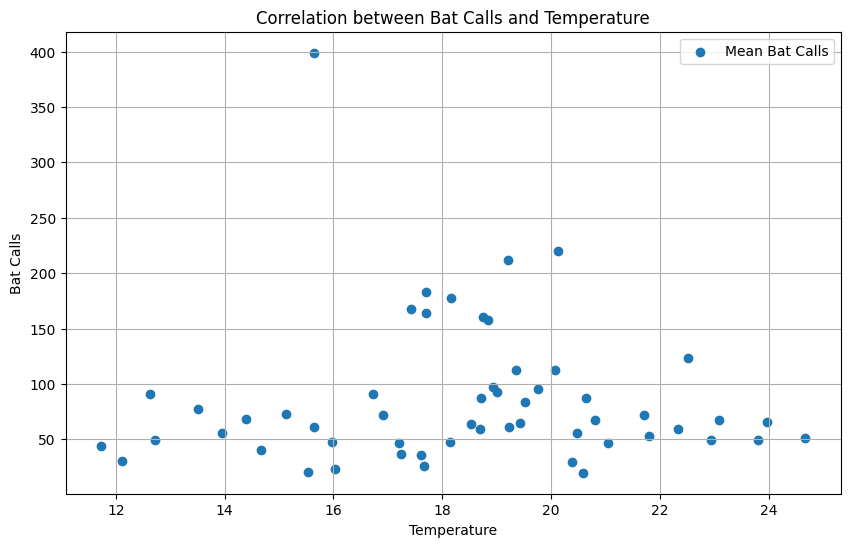

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample data - replace with your actual data
# Assuming you have two dataframes: 'foliage_df' and 'uwa23_df'

# Convert 'Datetime' column to datetime type if it's not already
centralpond_df['Datetime'] = pd.to_datetime(centralpond_df['Datetime'])


# Set 'Datetime' column as the index
centralpond_df.set_index('Datetime', inplace=True)


# Resample to get mean values per night
mean_bat_calls = centralpond_df['Bat Calls'].resample('D').mean()


# Create a new dataframe for plotting
plot_df = pd.DataFrame({'Temperature': mean_temperature, 'Bat Calls': mean_bat_calls})

# Filter out rows where 'Bat Calls' is 0
plot_df = plot_df[plot_df['Bat Calls'] != 0]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(plot_df['Temperature'], plot_df['Bat Calls'], label='Mean Bat Calls')  # Updated label here

# Add labels and title
plt.xlabel('Temperature')
plt.ylabel('Bat Calls')
plt.title('Correlation between Bat Calls and Temperature')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

LinAlgError: SVD did not converge in Linear Least Squares

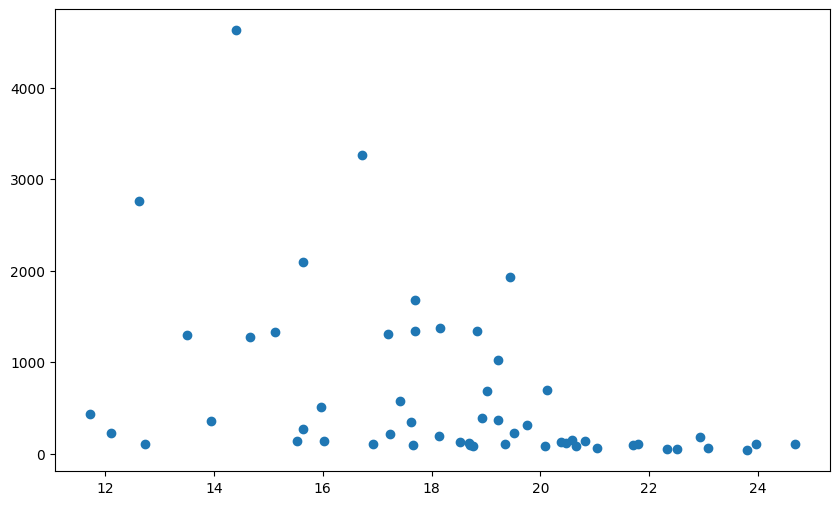

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample data - replace with your actual data
# Assuming you have two dataframes: 'foliage_df' and 'uwa23_df'

# Convert 'Datetime' column to datetime type if it's not already
telephonefield_df['Datetime'] = pd.to_datetime(telephonefield_df['Datetime'])


# Set 'Datetime' column as the index
telephonefield_df.set_index('Datetime', inplace=True)


# Resample to get mean values per night
mean_bat_calls = telephonefield_df['Bat Calls'].resample('D').mean()


# Create a new dataframe for plotting
plot_df = pd.DataFrame({'Temperature': mean_temperature, 'Bat Calls': mean_bat_calls})

# Filter out rows where 'Bat Calls' is 0
plot_df = plot_df[plot_df['Bat Calls'] != 0]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(plot_df['Temperature'], plot_df['Bat Calls'], label='Mean Bat Calls')  # Updated label here

# Calculate trendline using numpy's polyfit
coefficients = np.polyfit(plot_df['Temperature'], plot_df['Bat Calls'], 1)
trendline = np.poly1d(coefficients)

# Create x values for the trendline
x_values = np.linspace(plot_df['Temperature'].min(), plot_df['Temperature'].max(), len(plot_df))

# Plot trendline
plt.plot(x_values, trendline(x_values), color='r', linestyle='--', label='Trendline')

# Add labels and title
plt.xlabel('Temperature')
plt.ylabel('Bat Calls')
plt.title('Correlation between Bat Calls and Temperature')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data - replace with your actual data
# Assuming you have two dataframes: 'foliage_df' and 'uwa23_df'

# Convert 'Datetime' column to datetime type if it's not already
foliage_df['Datetime'] = pd.to_datetime(foliage_df['Datetime'])
uwa23_df['datetime'] = pd.to_datetime(uwa23_df['datetime'])

# Set 'Datetime' column as the index
foliage_df.set_index('Datetime', inplace=True)
uwa23_df.set_index('datetime', inplace=True)

# Filter data for June 8, 2023
specific_date = '2023-06-08'
foliage_data_on_date = foliage_df[foliage_df.index.date == pd.to_datetime(specific_date).date()]
uwa23_data_on_date = uwa23_df[uwa23_df.index.date == pd.to_datetime(specific_date).date()]

# Resample data for 30-minute intervals
resampled_foliage_data = foliage_data_on_date['Bat Calls'].resample('30T').mean()
resampled_uwa23_data = uwa23_data_on_date['Temperature'].resample('30T').mean()

# Create a new dataframe for plotting
plot_df = pd.DataFrame({'Temperature': resampled_uwa23_data, 'Bat Calls': resampled_foliage_data})

# Filter out rows where 'Bat Calls' is 0
plot_df = plot_df[plot_df['Bat Calls'] != 0]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(plot_df['Temperature'], plot_df['Bat Calls'], label=f'Mean Bat Calls on {specific_date}')

# Add labels and title
plt.xlabel('Temperature')
plt.ylabel('Bat Calls')
plt.title(f'Correlation between Bat Calls and Temperature on {specific_date}')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()




KeyError: 'Datetime'